In [1]:
cd ..

C:\Users\user\Documents\dton-wildfires-cleaner


In [2]:
import os

from sentinelhub import SHConfig, DataCollection
from sentinelhub.time_utils import iso_to_datetime
import matplotlib.pyplot as plt

from processing.date_utils import start_of_day, end_of_day
from processing.bbox_utils import create_bbox
from processing.fetching_utils import get_image
from processing.evalscripts import wildfire_detection
from processing.pinpoint_location import get_bbox

In [3]:
CLIENT_ID = os.environ['CLIENT_ID']
CLIENT_SECRET = os.environ['CLIENT_SECRET']

In [4]:
config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET

In [5]:
resolution=1000
bbox_dimension=150000 # length of the side of the square in meters
data_collection=DataCollection.SENTINEL3_SLSTR
url="https://creodias.sentinel-hub.com/api/v1/process"
evalscript=wildfire_detection
LIMIT_INCLUDED=0.8 # cutoff for the area taken up by the largest features
LIMIT_SCORE = 0.3

In [6]:
# https://eventregistry.org/event/eng-6369704
lat = -25.25028
lng = 153.16695
exact_date = iso_to_datetime('2020-11-22')
from_time = start_of_day(exact_date)
to_time = end_of_day(exact_date)

In [7]:
bbox = create_bbox(lat, lng, bbox_dimension)
width = height = int(bbox_dimension/resolution)

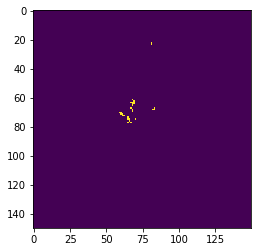

In [8]:
image = get_image(bbox, from_time, to_time, width, height, evalscript, data_collection, url, config)
plt.imshow(image, interpolation='none')

Found 7 features.


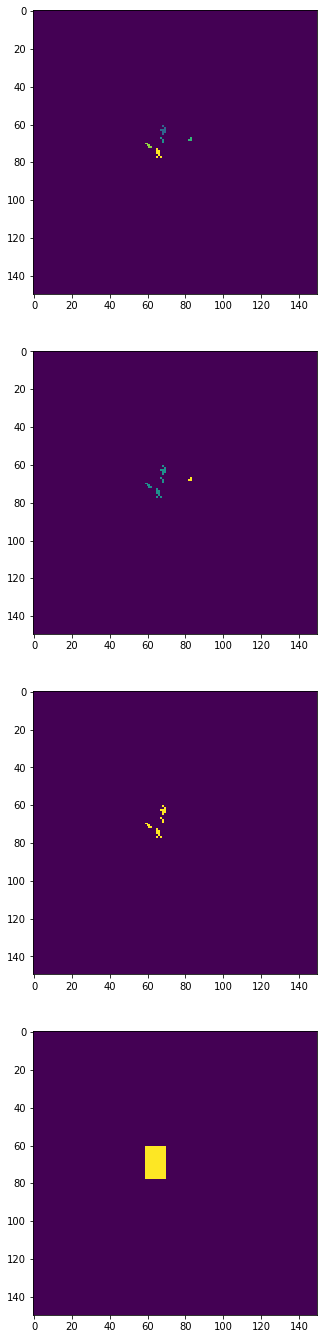

In [9]:
refined_bbox = get_bbox(image, bbox, LIMIT_INCLUDED, LIMIT_SCORE, verbose=True)

In [10]:
print(refined_bbox)

(153.0079394411468, -25.27724579749874, 153.11725920035838, -25.12443961167254)
